### <span style="color:#3c2f2f;font-size:1.2em; float:right; font-family:Times New Roman">KEYELA Patatchona, Нпммд-02-21</span>
## <span style="font-family:Times New Roman"> Лабораторная работа № 4 </span>

# Цель: 
1. Исследование сценарий размещения пользователей на плоскости и расчет 
вероятностей блокировок прямой видимости. 


## Задание. 
Построить согласно описанному ниже алгоритму имитационную модель, 
позволяющую рассчитать вероятность блокировки линии прямой видимости, и сравнить 
полученную характеристику с результатами математической модели.
1. В квадратной области со стороной А согласно точечному Пуассоновскому 
процессу с плотностью q разместить объекты (окружности с фиксированным 
радиусом r), которые могут заблокировать линию прямой видимости между двумя 
точками, размещенными на расстоянии x друг от друга внутри обозначенной 
области. Проверить блокирует ли хотя бы один объект линию прямой видимости.


2. Количество блокирующих объектов определяется согласно распределению 
Пуассона с параметром qA2
, а объекты вбрасываются независимо друг от друга. 
При этом центры блокирующих объектов должны быть распределены равномерно 
внутри рассматриваемой области.
На основе описанного выше алгоритма получить 1000 реализаций факта блокировки 
линии прямой видимости и рассчитать вероятность блокировки линии прямой 
видимости в поле блокирующих объектов. Полученный результат сравнить с 
результатами математической модели

In [7]:
# Needed libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from numpy.linalg import norm

## Задание начальных значений

In [8]:
guard_side = 10 #размер области от 0 до 10
poisson_lam_block = 0.2 #плотность q c которой возникают блокаторы
radius_block = 0.5 #радиус озон блокировок
distance_TxRx = 3 #дистанция x между передатчиком и приемником

## Рисовать круг

In [9]:
def plot_circle(x,y,r):
    angles=np.linspace(0,2*np.pi,50) #генерим угол
    x_cir=x+r*np.cos(angles)    #вычисляем координаты
    y_cir=y+r*np.sin(angles)
    plt.plot(x_cir,y_cir,'red') #отрисовка точек


## Создание точек, блокирующих объекты (задание)

In [10]:
def poisson_point_process(par_lambda,area_side):
    N = np.random.poisson(par_lambda * area_side**2) # количество блокаторов
    x = np.random.uniform(0,area_side,size=N)
    y = np.random.uniform(0,area_side,size=N)
    return x,y

x, y = poisson_point_process(poisson_lam_block,guard_side)

## Функция для расстояния от точки до прямой:

In [33]:
def check_distance(A, B, C):
    CA=(C-A)/norm(C-A)
    BA=(B-A)/norm(B-A)
    CB=(C-B)/norm(C-B)
    AB=(A-B)/norm(A-B)
    
    if np.arccos(np.dot(CA,BA))>1:
        return norm(C-A)
    if np.arccos(np.dot(CB,AB))>1:
        return norm(C-B)
    return norm(np.cross(A-B, A-C))/norm(B-A)

## Функция для прямоугольника вокруг линии прямой видимости:

In [21]:
def point_rectangle(x1, y1, x2, y2, angle):
    difference_angle=2*np.pi-angle
    reverse_angle=np.pi/2-difference_angle
    opposite_angle=reverse_angle+np.pi
    #координаты 4 точек прямоугольника
    x_A=x1+radius_block*np.cos(opposite_angle)
    y_A=y1+radius_block*np.sin(opposite_angle)
    
    x_B=x1+radius_block*np.cos(reverse_angle)
    y_B=y1+radius_block*np.sin(reverse_angle)
    
    x_C=x2+radius_block*np.cos(reverse_angle)
    y_C=y2+radius_block*np.sin(reverse_angle)
    
    x_D=x2+radius_block*np.cos(opposite_angle)
    y_D=y2+radius_block*np.sin(opposite_angle)
     
    return x_A, y_A, x_B, y_B, x_C, y_C, x_D, y_D

## Функция для определения пересечения блокаторов с линией прямой видимости:

In [29]:
def crossing():
    circle_point=[]
    point1=[]
    point2=[]
    point1.extend([x1, y1])
    point2.extend([x2, y2])
    
    for i in range(len(x)):
        circle_point.append([x[i], y[i]])
        
    for i in range(len(x)):
        if (np.round(check_distance(np.array(point1), np.array(point2), np.array(circle_point[i])), 1))<=radius_block:
            return True

## Координаьы передатчика и приемника

In [35]:
# координат первой точки
x1 = np.random.uniform(0,guard_side)
y1 = np.random.uniform(0,guard_side)

# Угол между ними
angle = np.random.uniform(0,2*np.pi)

#вычисление координат второй точки
x2 = x1 + distance_TxRx * np.cos(angle)
y2 = y1 + distance_TxRx * np.sin(angle)


In [36]:
#координаты точек прямоугольника
Ax,Ay,Bx,By,Cx,Cy,Dx,Dy=point_rectangle(x1,y1,x2,y2,angle)

## Рисунок

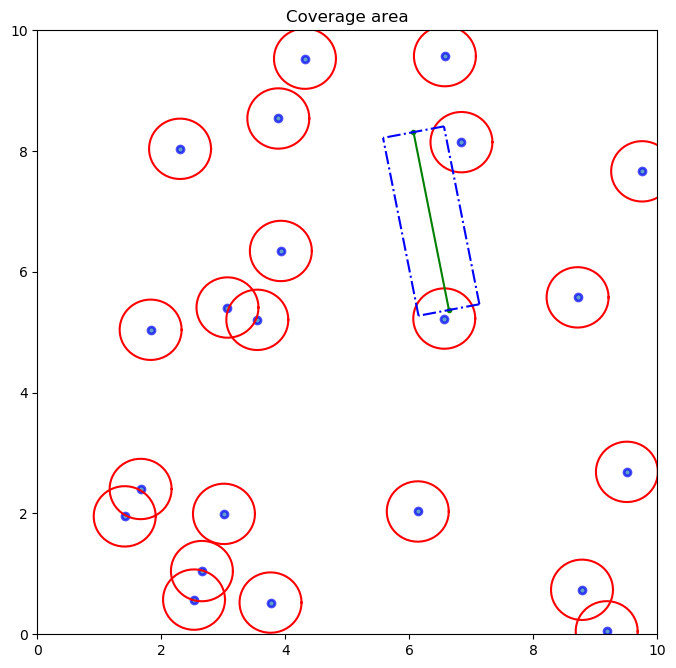

In [37]:
plt.figure(dpi=100, figsize=(8,8))#, facecolor='#c5c6c7')
plt.title("Coverage area")
plt.plot(x,y, '.', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)

for i in range(len(x)):
    plot_circle(x[i], y[i], radius_block)
plt.plot([x1,x2], [y1,y2],'.-g')

plt.plot([Ax, Bx], [Ay, By],'-.b')
plt.plot([Ax, Dx], [Ay, Dy],'-.b')
plt.plot([Bx, Cx], [By, Cy],'-.b')
plt.plot([Dx, Cx], [Dy, Cy],'-.b')

plt.xlim(0, guard_side)
plt.ylim(0, guard_side)
plt.show()

In [38]:
#события блокировки
if (crossing()):
    print('LoS blocked')
else: print('LoS is not blocked')

LoS blocked


##  Проверка блокировки

In [39]:
#проверка пересечения зоны блокировки
def check_signal_blockage(xy1, xy2,c_xy,c_r):
    x1, y1 = xy1 
    x2, y2 = xy2 
    x0, y0 = c_xy   #центр окружности
    
    k = (y2-y1)/(x2-x1) #вычисление k для уравнения прямой из двух точек
    b1 = y1 - x1*(y2-y1)/(x2-x1) #вычисление b для уравнения прямой из двух точек
    
    #подставляем уравнение y=kx+b1 в (x-x0)**2+(y-y0)**=c_r**2, чтобы найти есть ли у окружности и прямой общие точки
    #получается квадратное уравнение, решаем его, если дискриминант =>0, значит общие точки есть
    a = k**2+1 #коэффициент a, получившегося уравнения
    b = -2*x0+2*k*(b1-y0) #коэффициент b, получившегося уравнения
    c = x0**2+(b1-y0)**2-c_r**2 #коэффициент c, получившегося уравнения
    d = b**2-4*a*c #дискриминант
    if d>=0:
        block = True
    else:
        block = False
    return block


## Вероятность блокировки

In [46]:
N=1000 #кол-во реализаций
summa=0 #счетчик блокировок
for i in range(N):
    x, y=poisson_point_process(poisson_lam_block, guard_side)
    x1=np.random.uniform(0, guard_side)
    y1=np.random.uniform(0, guard_side)
    angle=np.random.uniform(0,2*np.pi)
    x2=x1-distance_TxRx*np.cos(angle)
    y2=y1-distance_TxRx*np.sin(angle)
    
    if (crossing()):
        summa+=1
print('Вероятность блокировки =', summa/N)

Вероятность блокировки = 0.505


In [42]:
#вероятность блокировки по аналитической формуле
S=2*radius_block*distance_TxRx #площадь зоны блокирвки
lambd=poisson_lam_block*S #среднее кол-во блокирующих объектов на ед. площади
probability=1-np.exp(-lambd) #вероятность блокировки
print('Blocking probability-2 =',probability)

Blocking probability-2 = 0.4511883639059736


In [51]:
# НЕПРАВИЛЬНО

#Иммитационное моделирвоание
num_experiments = 1000
summa = 0
for i in range (num_experiments): #задаём различные точки и зоны блокировки как в предыдущем пункте задания
    dots_x, dots_y=poisson_point_process(poisson_lam_block, guard_side)
    x1 = np.random.uniform(0,guard_side)
    y1 = np.random.uniform(0,guard_side)
    angle = np.random.uniform(0,2*np.pi)
    x2 = x1 + distance_TxRx * np.cos(angle)
    y2 = y1 + distance_TxRx * np.sin(angle)
    for j in range(len(dots_y)): #для всех зон блокировки проверяем условие с помощью вышеописанной функции
        blocked = check_signal_blockage([x1,y1], [x2,y2],[dots_x[j],dots_y[j]],radius_block)
        if blocked == True:
            summa+=1 #если блокировка произошла - дальше считать нет смысла, выходим из цикла
            break
print('количество блокировок: ',summa)
print('Доля блокировок = ', summa/num_experiments)

#Вероятность блокировки по аналитической формуле из презентации
s_zone = 2*guard_side *distance_TxRx
lam = poisson_lam_block*s_zone

p=1-np.exp(-lam)
print('Аналитическая вероятность блокировки = %.3f'%p)

количество блокировок:  831
Доля блокировок =  0.831
Аналитическая вероятность блокировки = 1.000


# Вывод

Эта работа была посвещена исследованию сценарий размещения пользователей на плоскости и расчет вероятностей блокировок прямой видимости. В ходе выполнения я построил имитационную модель, позволяющую рассчитать вероятность блокировки линии прямой видимости, и сравнил полученную характеристику с результатами математической модели. Сначала в квадратной области со стороной А согласно точечному Пуассоновскому процессу с плотностью q разместил объекты (окружности с фиксированным радиусом r), которые могут заблокировать линию прямой видимости между двумя точками, размещенными на расстоянии x друг от друга внутри обозначенной области. Дальше проверил блокирует ли хотя бы один объект линию прямой видимости.

Количество блокирующих объектов определяется согласно распределению Пуассона с параметром qA2 , а объекты вбрасываются независимо друг от друга. При этом центры блокирующих объектов должны быть распределены равномерно внутри рассматриваемой области. На основе описанного я получил 1000 реализаций факта блокировки линии прямой видимости и рассчитал вероятность блокировки линии прямой видимости в поле блокирующих объектов. Полученный результат сравнил с результатами математической модели, и он чуть ниже вероятности блокировки в математической модели.